In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import glob

In [2]:
benchmark_results = [
    pd.read_csv(path)
    for path in glob.glob('../benchmarks/2020-12-08-priority-frontier-mpi-procs/*.csv')
]
benchmark_results = pd.concat(benchmark_results)

benchmark_results.sample(5)

,generation_config_i,input_strategy,input_length_1,input_change_strength,input_chunkiness,input_distribution,regen_i,repetition_i,diff_program,mpi_procs,micros_input,micros_precompute,micros_until_len,micros_edit_script
64,64,add,8400,0.2,0.0,zipf,0,0,mpi_priority_frontier,5,1424,0,6060,0
56,14,remove,2000,1.0,0.0,zipf,0,0,mpi_priority_frontier,2,137,0,7521,0
177,74,remove,8400,0.8,0.0,zipf,0,1,mpi_priority_frontier,4,871,0,61454,0
134,55,remove,6800,0.6,0.0,zipf,0,0,mpi_priority_frontier,7,789,0,19728,0
115,95,addremove,10000,1.0,0.0,zipf,0,1,mpi_priority_frontier,8,1642,0,84354,0


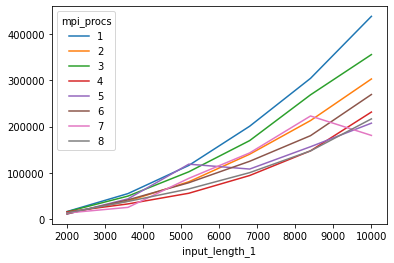

In [3]:
temp = benchmark_results.groupby(['generation_config_i', 'mpi_procs']).min()
temp = temp[temp['input_strategy'] == 'independent']
temp = temp.set_index('input_length_1', append=True)
temp = temp.unstack('mpi_procs')['micros_until_len']
temp = temp.droplevel('generation_config_i')
temp = temp.sort_index()

temp.plot();

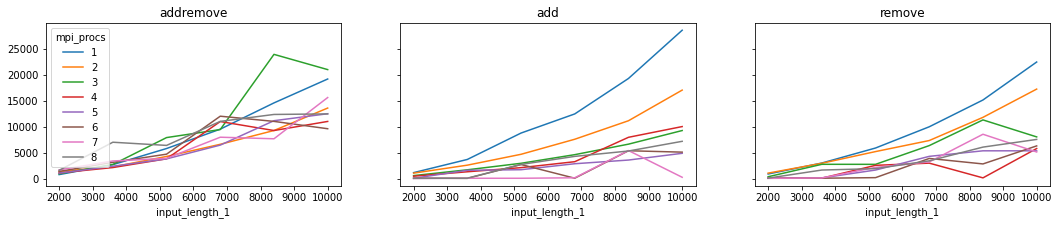

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(18, 3), sharex=True, sharey='row')
for input_strategy_i, input_strategy in enumerate(['addremove', 'add', 'remove']):
    temp = benchmark_results.groupby(['generation_config_i', 'mpi_procs']).min()
    temp = temp[(temp['input_strategy'] == input_strategy) & (temp['input_change_strength'] == 1/5) & (temp['input_chunkiness'] == 0)]
    temp = temp.set_index('input_length_1', append=True)
    temp = temp.unstack('mpi_procs')['micros_until_len']
    temp = temp.droplevel('generation_config_i')
    temp = temp.sort_index()

    temp.plot(ax=ax[input_strategy_i], legend=(input_strategy_i == 0), title=input_strategy);

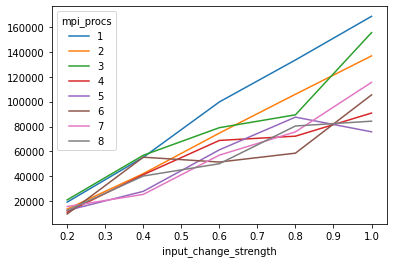

In [5]:
temp = benchmark_results.groupby(['generation_config_i', 'mpi_procs']).min()
temp = temp[(temp['input_strategy'] == 'addremove') & (temp['input_length_1'] == temp['input_length_1'].max()) & (temp['input_chunkiness'] == 0)]
temp = temp.set_index('input_change_strength', append=True)
temp = temp.unstack('mpi_procs')['micros_until_len']
temp = temp.droplevel('generation_config_i')
temp = temp.sort_index()

temp.plot();